# ECG Heartbeat Classification using Machine Learning and Deep Learning Techniques

Problem Statement: Given a dataset of ECG signals, develop a model that can accurately classify different types of heartbeats. The dataset contains ECG signals that are labeled into five classes: normal beat (N), left bundle branch block beat (L), right bundle branch block beat (R), atrial premature beat (A), and premature ventricular contraction (V). The goal is to create a model that can distinguish between these different heartbeat types using machine learning and deep learning techniques, and evaluate its performance using appropriate metrics such as accuracy, F1-score, and confusion matrix.

## Data Exploration

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb

In [33]:
np.random.seed(42)

In [34]:
dataset_path = "c:\\Users\\sinda\\OneDrive\\Bureau\\classification\\ECG-Heartbeat-Classification\\mit-bih-arrhythmia-database"


In [35]:
# Load a sample ECG record from the dataset
record_id = '100'  
record = wfdb.rdrecord(f'{dataset_path}/{record_id}')

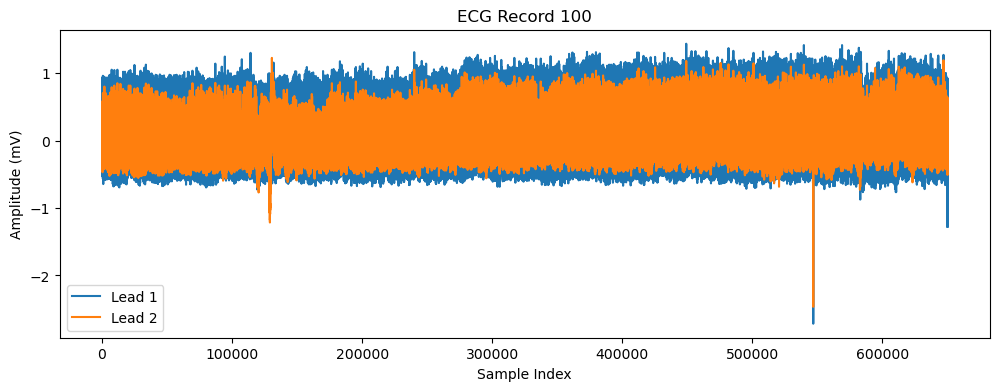

In [36]:
# Plot the ECG signals from both leads
plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[:, 0], label='Lead 1')
plt.plot(record.p_signal[:, 1], label='Lead 2')
plt.title(f'ECG Record {record_id}')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

In [37]:
# Load the annotations for the record
annotations = wfdb.rdann(f'{dataset_path}/{record_id}', 'atr')

# Print the first 10 annotations
print('First 10 annotations:')
for i in range(10):
    print(f"Sample: {annotations.sample[i]}, Type: {annotations.symbol[i]}, Description: {annotations.aux_note[i]}")

First 10 annotations:
Sample: 18, Type: +, Description: (N 
Sample: 77, Type: N, Description: 
Sample: 370, Type: N, Description: 
Sample: 662, Type: N, Description: 
Sample: 946, Type: N, Description: 
Sample: 1231, Type: N, Description: 
Sample: 1515, Type: N, Description: 
Sample: 1809, Type: N, Description: 
Sample: 2044, Type: A, Description: 
Sample: 2402, Type: N, Description: 


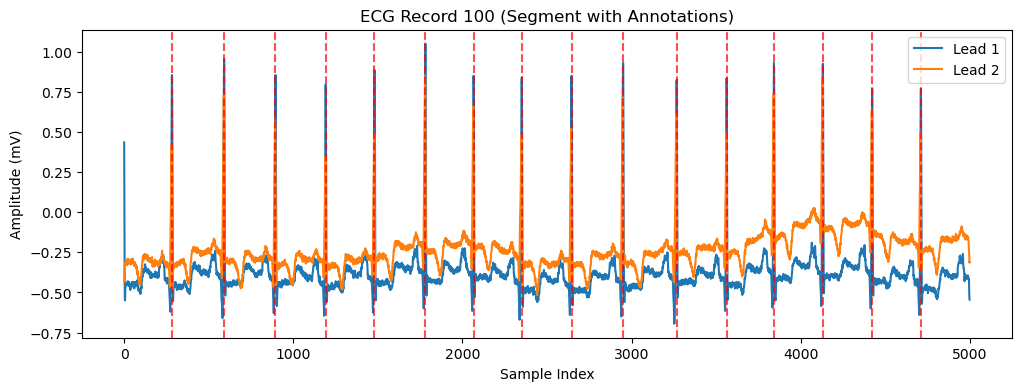

In [38]:
# Visualize a segment of the ECG signal with annotations
start_sample = 10000
end_sample = 15000

plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[start_sample:end_sample, 0], label='Lead 1')
plt.plot(record.p_signal[start_sample:end_sample, 1], label='Lead 2')
# Mark the annotated beats
for i in range(len(annotations.sample)):
    if start_sample <= annotations.sample[i] < end_sample:
        plt.axvline(x=annotations.sample[i] - start_sample, color='r', linestyle='--', alpha=0.7, label='Annotated Beat' if i == 0 else "")

plt.title(f'ECG Record {record_id} (Segment with Annotations)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

In [39]:
from collections import Counter

# Calculate the duration of the ECG record
record_duration = record.sig_len / record.fs
print(f"Duration of ECG Record {record_id}: {record_duration} seconds")

# Count the occurrences of different annotation types
annotation_counter = Counter(annotations.symbol)

# Display the annotation types and their counts
print("Annotation types and counts:")
for annotation_type, count in annotation_counter.items():
    print(f"{annotation_type}: {count}")

Duration of ECG Record 100: 1805.5555555555557 seconds
Annotation types and counts:
+: 1
N: 2239
A: 33
V: 1


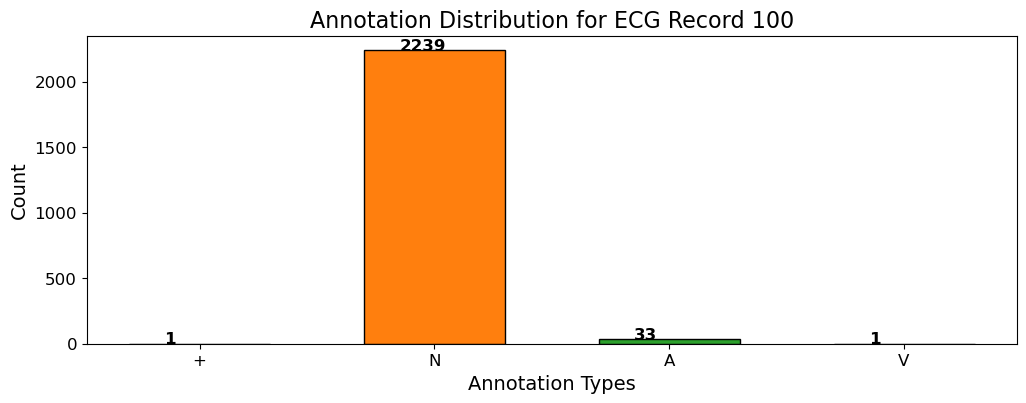

In [40]:
# Visualize the annotation distribution
plt.figure(figsize=(12, 4))
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
edge_colors = ['black'] * len(annotation_counter.keys())
bar_width = 0.6

plt.bar(annotation_counter.keys(), annotation_counter.values(), color=bar_colors, edgecolor=edge_colors, linewidth=1, width=bar_width)

for i, v in enumerate(annotation_counter.values()):
    plt.text(i - 0.15, v + 0.01, str(v), fontsize=12, fontweight='bold')

plt.title(f'Annotation Distribution for ECG Record {record_id}', fontsize=16)
plt.xlabel('Annotation Types', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [41]:
def calculate_average_hr(record_id, annotations):
    rr_intervals = np.diff(annotations.sample) / record.fs * 1000  # Calculate RR intervals in ms
    avg_hr = 60000 / np.mean(rr_intervals)  # Calculate average heart rate in bpm
    return avg_hr

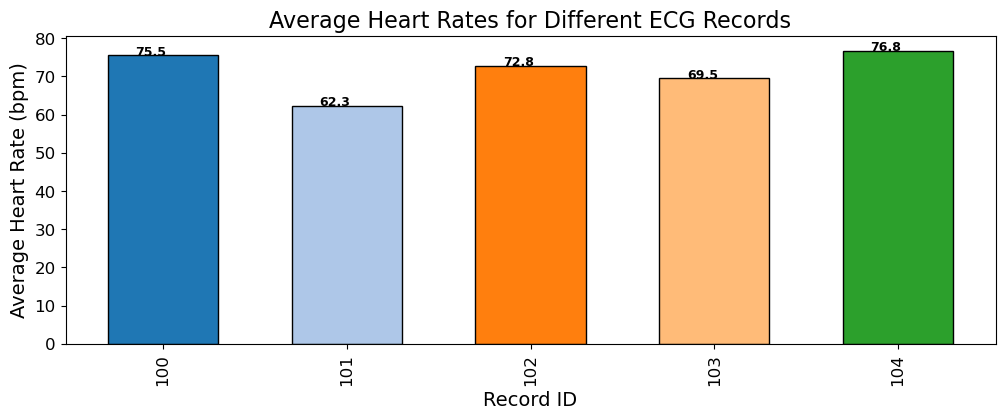

In [42]:
# List of records to load and compare
record_ids = ['100', '101', '102', '103', '104']

# Load ECG records and their annotations
records = [wfdb.rdrecord(f'{dataset_path}/{record_id}') for record_id in record_ids]
annotations_list = [wfdb.rdann(f'{dataset_path}/{record_id}', 'atr') for record_id in record_ids]

# Calculate average heart rates for each record
average_hr_list = [calculate_average_hr(record_id, annotations) for record_id, annotations in zip(record_ids, annotations_list)]

# Visualize average heart rates in a bar chart
plt.figure(figsize=(12, 4))
bar_colors = plt.colormaps['tab20'](range(len(record_ids)))
edge_colors = ['black'] * len(record_ids)
bar_width = 0.6

bars = plt.bar(record_ids, average_hr_list, color=bar_colors, edgecolor=edge_colors, linewidth=1, width=bar_width)

for i, v in enumerate(average_hr_list):
    plt.text(i - 0.15, v + 0.01, str(round(v, 1)), fontsize=9, fontweight='bold')

plt.title('Average Heart Rates for Different ECG Records', fontsize=16)
plt.xlabel('Record ID', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Average Heart Rate (bpm)', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

This code snippet defines a function get_beat_distribution to calculate the distribution of beat types in the dataset. It loads annotations for all records in the dataset and calculates the distribution of beat types. Finally, it visualizes the distribution in a pie chart.

In [43]:
from collections import Counter

def get_beat_distribution(annotations_list):
    beat_types = []
    for annotations in annotations_list:
        beat_types.extend(annotations.symbol)
    return Counter(beat_types)

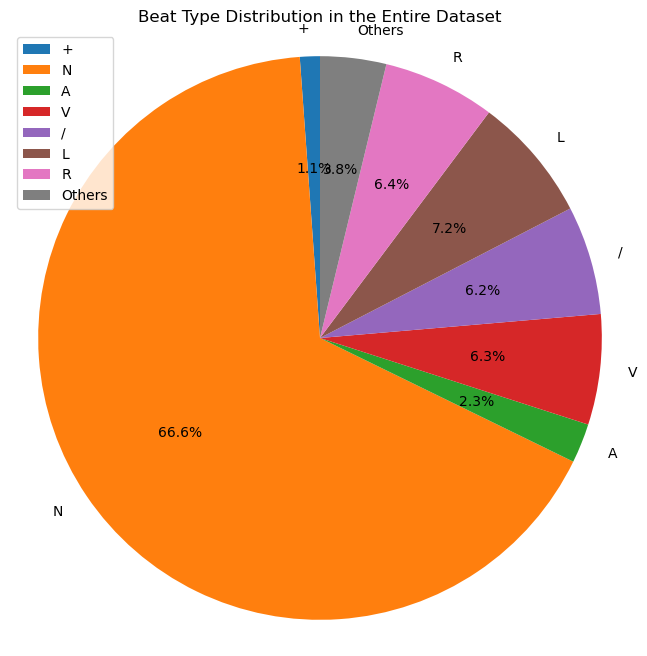

In [44]:
# Load annotations for all records in the dataset
all_record_ids = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
all_annotations = [wfdb.rdann(f'{dataset_path}/{record_id}', 'atr') for record_id in all_record_ids]

# Calculate the distribution of beat types
beat_distribution = get_beat_distribution(all_annotations)

# Visualize beat distribution in a pie chart
labels = list(beat_distribution.keys())
sizes = list(beat_distribution.values())

# Set a threshold to group small percentages into "Others"
threshold = 1  # percentage

# Calculate the total number of beats
total_beats = sum(sizes)

# Calculate the percentage for each beat type
percentages = [(count / total_beats) * 100 for count in sizes]

# Group beat types with a percentage less than the threshold into "Others"
labels_filtered = []
sizes_filtered = []
other_count = 0

for i, percentage in enumerate(percentages):
    if percentage >= threshold:
        labels_filtered.append(labels[i])
        sizes_filtered.append(sizes[i])
    else:
        other_count += sizes[i]

if other_count > 0:
    labels_filtered.append('Others')
    sizes_filtered.append(other_count)

# Visualize the filtered beat distribution in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes_filtered, labels=labels_filtered, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Beat Type Distribution in the Entire Dataset')
plt.legend()
plt.show()


### This code snippet iterates through all the records in the dataset, reads the annotations, and stores the counts of each beat type. It then calculates the average number of beats for each beat type across all records and visualizes this information in a bar chart. This visualization provides insight into the distribution of beat types on a per-record basis.

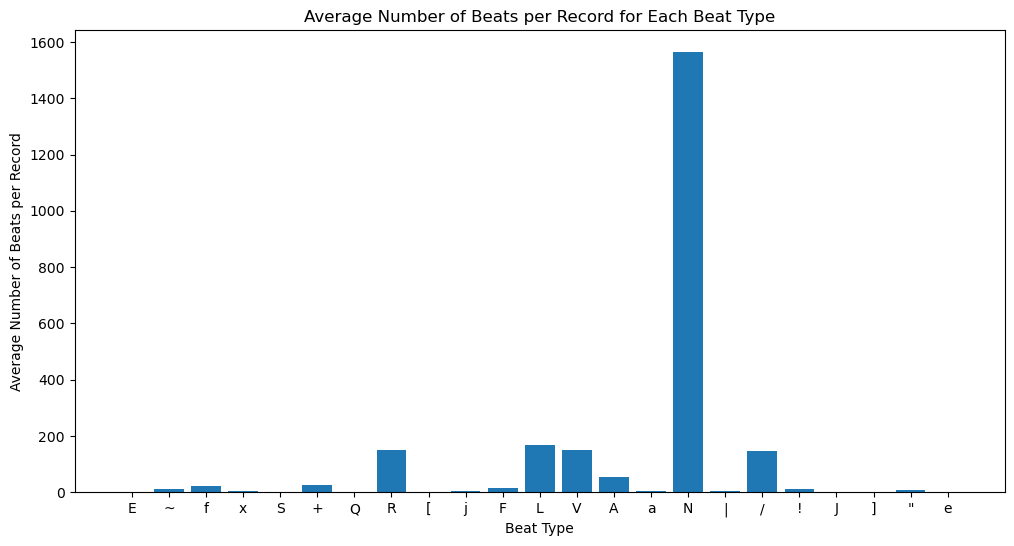

In [45]:
import os

record_ids = [record for record in os.listdir(dataset_path) if record.endswith('.dat')]
record_ids = [os.path.splitext(record)[0] for record in record_ids]

beat_counts = []
beat_types = set()

for record_id in record_ids:
    annotations = wfdb.rdann(f'{dataset_path}/{record_id}', 'atr')
    unique_beat_types, counts = np.unique(annotations.symbol, return_counts=True)
    
    # Update the set of unique beat types
    beat_types |= set(unique_beat_types)
    
    # Store the beat counts for this record
    beat_counts.append(dict(zip(unique_beat_types, counts)))

# Create a dictionary for storing the total counts for each beat type
beat_type_totals = {beat_type: 0 for beat_type in beat_types}

# Sum the counts for each beat type across all records
for record_beat_counts in beat_counts:
    for beat_type, count in record_beat_counts.items():
        beat_type_totals[beat_type] += count

# Calculate the average number of beats for each beat type across all records
num_records = len(record_ids)
beat_type_averages = {beat_type: total / num_records for beat_type, total in beat_type_totals.items()}

# Visualize the average beat counts per record for each beat type
plt.figure(figsize=(12, 6))
plt.bar(beat_type_averages.keys(), beat_type_averages.values())
plt.title("Average Number of Beats per Record for Each Beat Type")
plt.xlabel("Beat Type")
plt.ylabel("Average Number of Beats per Record")
plt.show()

### This code snippet calculates the duration of each ECG record and plots a histogram to visualize the distribution of record durations.

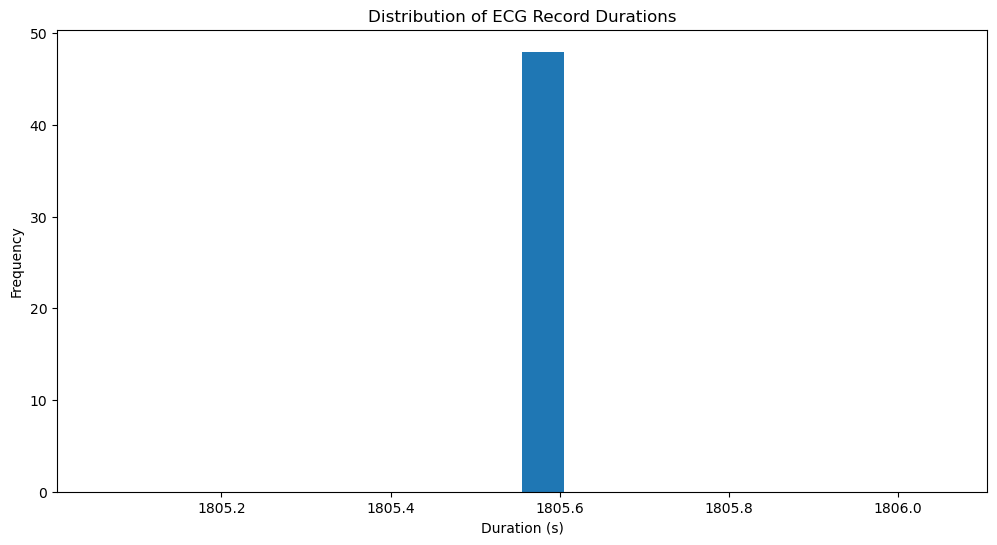

In [46]:
durations = []

for record_id in record_ids:
    record = wfdb.rdrecord(f'{dataset_path}/{record_id}')
    duration = record.sig_len / record.fs
    durations.append(duration)

plt.figure(figsize=(12, 6))
plt.hist(durations, bins=20)
plt.title("Distribution of ECG Record Durations")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.show()

### This code snippet calculates the RR intervals for each beat type and visualizes their distributions using box plots. The RR interval is the time between consecutive R-peaks in the ECG signal.

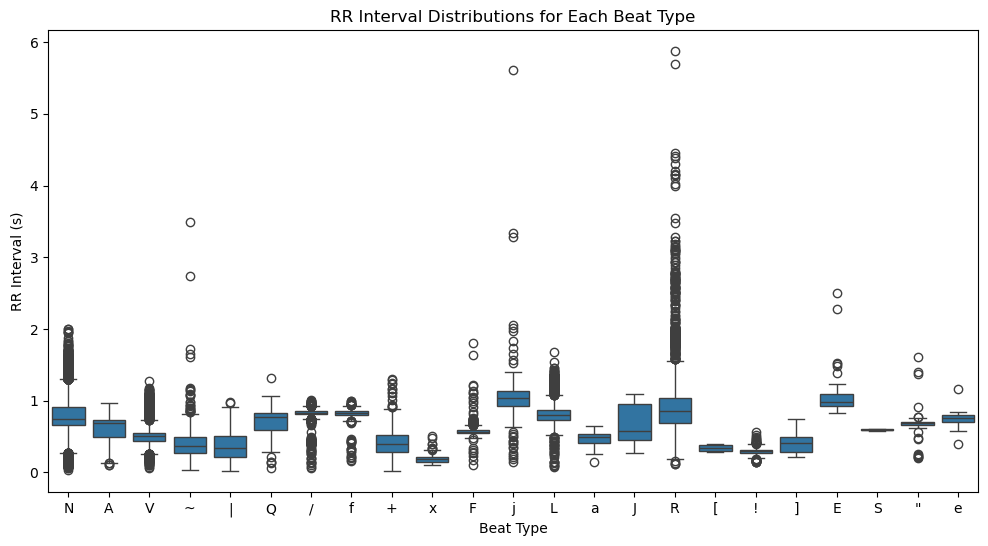

In [47]:
import seaborn as sns
import pandas as pd

rr_intervals = []

for record_id in record_ids:
    annotations = wfdb.rdann(f'{dataset_path}/{record_id}', 'atr')
    for i in range(1, len(annotations.sample)):
        rr_interval = (annotations.sample[i] - annotations.sample[i-1]) / record.fs
        beat_type = annotations.symbol[i]
        rr_intervals.append((beat_type, rr_interval))

rr_intervals_df = pd.DataFrame(rr_intervals, columns=["Beat Type", "RR Interval"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="Beat Type", y="RR Interval", data=rr_intervals_df)
plt.title("RR Interval Distributions for Each Beat Type")
plt.xlabel("Beat Type")
plt.ylabel("RR Interval (s)")
plt.show()

## Data Pre-processing 

Before diving into data preprocessing, it's important to understand the objectives and the data format. In this case, we'll focus on classifying arrhythmia types using the ECG signals. We'll preprocess the data to prepare it for a machine learning model.

Here's an outline of the data preprocessing steps:

1. Load ECG signals and annotations for each record
2. Segment the ECG signals based on annotations and assign class labels
3. Normalize the ECG segments
4. Split the dataset into training and testing sets

In [ ]:
import numpy as np
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

def load_ecg_record(record_id):
    record = wfdb.rdrecord(f'{dataset_path}/{record_id}')
    annotations = wfdb.rdann(f'{dataset_path}/{record_id}', 'atr')
    return record, annotations

def segment_ecg(record, annotations,         ):
    ecg_segments = []
    labels = []
    
    for i in range(1, len(annotations.sample)):
        start = annotations.sample[i-1]
        end = annotations.sample[i]
        segment_length = end - start

        if segment_length > window_size:
            continue

        segment = record.p_signal[start:end, 0]
        segment = np.pad(segment, (0, window_size - segment_length), 'constant')
        label = annotations.symbol[i]

        ecg_segments.append(segment)
        labels.append(label)
        
    return np.array(ecg_segments), labels

def normalize_ecg_segments(ecg_segments):
    scaler = StandardScaler()
    return scaler.fit_transform(ecg_segments), scaler

In [49]:
record_ids = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
window_size = 180

all_segments = []
all_labels = []

for record_id in record_ids:
    record, annotations = load_ecg_record(record_id)
    ecg_segments, labels = segment_ecg(record, annotations, window_size)
    all_segments.extend(ecg_segments)
    all_labels.extend(labels)

all_segments = np.array(all_segments)
all_labels = np.array(all_labels)

label_mapping = {
    'N': 0,  # Normal beat
    'L': 1,  # Left bundle branch block beat
    'R': 2,  # Right bundle branch block beat
    'A': 3,  # Atrial premature beat
    'V': 4,  # Premature ventricular contraction
}

filtered_segments = []
filtered_labels = []

for segment, label in zip(all_segments, all_labels):
    if label in label_mapping:
        filtered_segments.append(segment)
        filtered_labels.append(label_mapping[label])

filtered_segments = np.array(filtered_segments)
filtered_labels = np.array(filtered_labels)

smote = SMOTE(random_state=42)
balanced_segments, balanced_labels = smote.fit_resample(filtered_segments, filtered_labels)

normalized_segments, scaler = normalize_ecg_segments(balanced_segments)
joblib.dump(scaler, 'scaler.pkl') # Save the scaler to a file

X_train, X_test, y_train, y_test = train_test_split(normalized_segments, balanced_labels, test_size=0.3, random_state=42, stratify=balanced_labels)

In [50]:
from collections import Counter

label_count = Counter(y_train)
print(label_count)

Counter({1: 2419, 4: 2419, 2: 2418, 3: 2418, 0: 2418})


This code first loads the ECG records and segments them into individual heartbeats. Then, it filters out the samples with undefined labels and maps the labels to numerical values. It balances the dataset using the SMOTE algorithm and normalizes the ECG signals using the StandardScaler from scikit-learn. Finally, it splits the data into training and testing sets.

## Feature Extraction

In this example, we will extract features using wavelet analysis. Wavelet analysis is a powerful tool for analyzing non-stationary signals like ECG. It provides time-frequency information that can be used to extract relevant features.

We will use the PyWavelets library to perform wavelet analysis

In [51]:
import numpy as np
import pywt

def extract_wavelet_features(ecg_segments):
    features = []
    
    for segment in ecg_segments:
        # Perform discrete wavelet transform using the Daubechies 4 wavelet
        coeffs = pywt.wavedec(segment, 'db4', level=4)
        
        # Calculate the standard deviation of each wavelet coefficient
        std_coeffs = [np.std(coeff) for coeff in coeffs]
        
        # Calculate the energy of each wavelet coefficient
        energy_coeffs = [np.sum(coeff ** 2) for coeff in coeffs]
        
        # Calculate the entropy of each wavelet coefficient
        entropy_coeffs = [np.sum(-abs(coeff) * np.log2(abs(coeff) + 1e-8)) for coeff in coeffs]
        
        # Concatenate the features
        feature_vector = np.concatenate([std_coeffs, energy_coeffs, entropy_coeffs])
        
        features.append(feature_vector)
    
    return np.array(features)

X_train_features = extract_wavelet_features(X_train)
X_test_features = extract_wavelet_features(X_test)

### PCA Based Feature Extraction

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)  # Choose the number of components to keep
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Deep Learning Based Feature Extraction

In [53]:
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.random.set_seed(42)

encoding_dim = 16

input_ecg = Input(shape=(window_size,))
encoded = Dense(encoding_dim, activation='relu')(input_ecg)
decoded = Dense(window_size, activation='sigmoid')(encoded)

autoencoder = Model(input_ecg, decoded)
encoder = Model(input_ecg, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

Note: you may need to restart the kernel to use updated packages.
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2137 - val_loss: 0.9925
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9627 - val_loss: 0.8565
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8610 - val_loss: 0.8063
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8193 - val_loss: 0.7806
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7967 - val_loss: 0.7638
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7812 - val_loss: 0.7519
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7701 - val_loss: 0.7426
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7612 - val_loss: 0.7352
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7541 - val_loss: 0.7294
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7487 - val_loss: 0.7249
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7444 - val_loss: 0.72

### Classification Techniques

In [54]:
X_train_all_features = np.concatenate([X_train_features, X_train_pca, X_train_encoded], axis=1)
X_test_all_features = np.concatenate([X_test_features, X_test_pca, X_test_encoded], axis=1)

In this section, we will implement and evaluate the following classification techniques: Random Forest, Support Vector Machine (SVM), Convolutional Neural Networks (CNN), and Long Short-Term Memory (LSTM) networks.

### 1. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_all_features, y_train)

y_train_pred_rf = rf_classifier.predict(X_train_all_features)
y_test_pred_rf = rf_classifier.predict(X_test_all_features)

print("Random Forest - Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Random Forest - Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2418
           1       1.00      1.00      1.00      2419
           2       1.00      1.00      1.00      2418
           3       1.00      1.00      1.00      2418
           4       1.00      1.00      1.00      2419

    accuracy                           1.00     12092
   macro avg       1.00      1.00      1.00     12092
weighted avg       1.00      1.00      1.00     12092

Random Forest - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1037
           1       0.98      1.00      0.99      1036
           2       0.98      1.00      0.99      1037
           3       0.97      0.96      0.96      1037
           4       0.92      0.91      0.91      1036

    accuracy                           0.95      5183
   macro avg       0.95      0.

### 2. Support Vector Machine Classifier

In [56]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1, random_state=42)
svm_classifier.fit(X_train_all_features, y_train)

y_train_pred_svm = svm_classifier.predict(X_train_all_features)
y_test_pred_svm = svm_classifier.predict(X_test_all_features)

print("Support Vector Machine - Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_svm))
print("Support Vector Machine - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

Support Vector Machine - Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.22      0.30      2418
           1       0.44      0.89      0.59      2419
           2       0.83      0.54      0.65      2418
           3       0.75      0.65      0.70      2418
           4       0.70      0.71      0.70      2419

    accuracy                           0.60     12092
   macro avg       0.64      0.60      0.59     12092
weighted avg       0.64      0.60      0.59     12092

Support Vector Machine - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.22      0.30      1037
           1       0.44      0.88      0.59      1036
           2       0.84      0.53      0.65      1037
           3       0.76      0.67      0.71      1037
           4       0.67      0.69      0.68      1036

    accuracy                           0.60      5183
   macro avg 

### 3. Convolutional Neural Network Classifier

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

num_classes = len(np.unique(y_train))

cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/10


c:\Users\sinda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6159 - loss: 1.0274 - val_accuracy: 0.8856 - val_loss: 0.3951
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8703 - loss: 0.4126 - val_accuracy: 0.9087 - val_loss: 0.2701
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9090 - loss: 0.2868 - val_accuracy: 0.9249 - val_loss: 0.2147
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9264 - loss: 0.2347 - val_accuracy: 0.9379 - val_loss: 0.1836
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9319 - loss: 0.2042 - val_accuracy: 0.9454 - val_loss: 0.1628
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9452 - loss: 0.1654 - val_accuracy: 0.9512 - val_loss: 0.1480
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9475 - loss: 0.1574 - val_accuracy: 0.9539 - val_loss: 0.1505
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9538 - loss: 0.1352 - val_accuracy: 0.9576 - val_

### 4. Long Short-Term Memory (LSTM) Classifier

In [58]:
from tensorflow.keras.layers import LSTM

X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm_model = Sequential([
    LSTM(64, input_shape=(window_size, 1), return_sequences=True),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test))

Epoch 1/10


c:\Users\sinda\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.3289 - loss: 1.4861 - val_accuracy: 0.5180 - val_loss: 1.2337
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.5590 - loss: 1.1347 - val_accuracy: 0.6404 - val_loss: 0.9441
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.6695 - loss: 0.9062 - val_accuracy: 0.6963 - val_loss: 0.8076
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.7103 - loss: 0.8235 - val_accuracy: 0.7264 - val_loss: 0.7828
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.7323 - loss: 0.7761 - val_accuracy: 0.7490 - val_loss: 0.6962
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.7455 - loss: 0.7199 - val_accuracy: 0.7453 - val_loss: 0.6933
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.7646 - loss: 0.6758 - val_accuracy: 0.7941 - val_loss: 0.6075
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.7801 - loss: 0.6376 - val_accurac

## Model Evaluation

In [59]:
# Evaluate the performance of Random Forest
print("Random Forest - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Evaluate the performance of Support Vector Machine
print("Support Vector Machine - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

# Evaluate the performance of Convolutional Neural Network
y_test_pred_cnn = cnn_model.predict(X_test_cnn)
y_test_pred_cnn = np.argmax(y_test_pred_cnn, axis=1)
print("Convolutional Neural Network - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_cnn))

# Evaluate the performance of Long Short-Term Memory
y_test_pred_lstm = lstm_model.predict(X_test_lstm)
y_test_pred_lstm = np.argmax(y_test_pred_lstm, axis=1)
print("Long Short-Term Memory - Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_lstm))

Random Forest - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1037
           1       0.98      1.00      0.99      1036
           2       0.98      1.00      0.99      1037
           3       0.97      0.96      0.96      1037
           4       0.92      0.91      0.91      1036

    accuracy                           0.95      5183
   macro avg       0.95      0.95      0.95      5183
weighted avg       0.95      0.95      0.95      5183

Support Vector Machine - Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.22      0.30      1037
           1       0.44      0.88      0.59      1036
           2       0.84      0.53      0.65      1037
           3       0.76      0.67      0.71      1037
           4       0.67      0.69      0.68      1036

    accuracy                           0.60      5183
   macro avg       0.64   

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_classification_report(classification_report_dict, model_name, cmap='coolwarm'):
    report_data = []
    classes = list(classification_report_dict.keys())
    for cls, metrics in classification_report_dict.items():
        if isinstance(metrics, dict):
            report_data.append([cls] + [v for k, v in metrics.items() if k != 'support'])

    df_report = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-score'])
    df_report.set_index('Class', inplace=True)

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report, annot=True, fmt=".2f", cmap=cmap)
    plt.title(f"{model_name} - Classification Report")
    plt.yticks(rotation=0)
    plt.show()

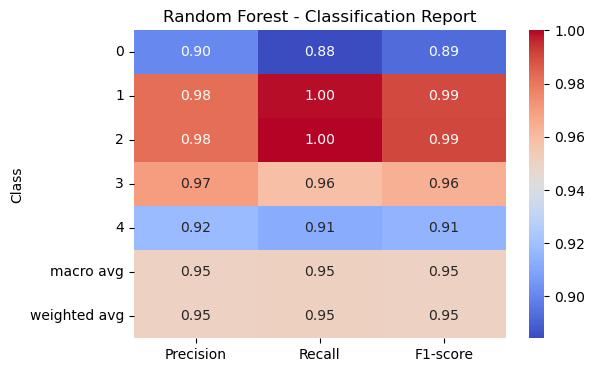

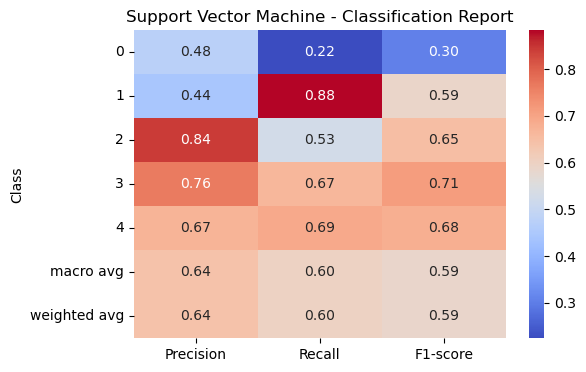

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


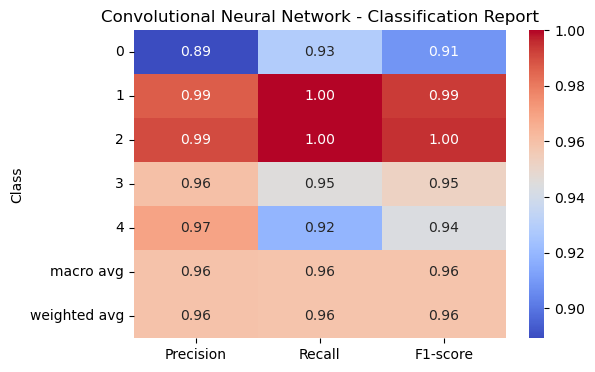

162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


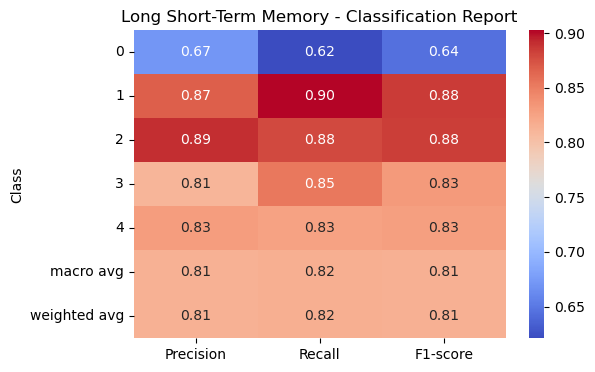

In [61]:
# Evaluate the performance of Random Forest
rf_report_dict = classification_report(y_test, y_test_pred_rf, output_dict=True)
plot_classification_report(rf_report_dict, 'Random Forest')

# Evaluate the performance of Support Vector Machine
svm_report_dict = classification_report(y_test, y_test_pred_svm, output_dict=True)
plot_classification_report(svm_report_dict, 'Support Vector Machine')

# Evaluate the performance of Convolutional Neural Network
y_test_pred_cnn = cnn_model.predict(X_test_cnn)
y_test_pred_cnn = np.argmax(y_test_pred_cnn, axis=1)
cnn_report_dict = classification_report(y_test, y_test_pred_cnn, output_dict=True)
plot_classification_report(cnn_report_dict, 'Convolutional Neural Network')

# Evaluate the performance of Long Short-Term Memory
y_test_pred_lstm = lstm_model.predict(X_test_lstm)
y_test_pred_lstm = np.argmax(y_test_pred_lstm, axis=1)
lstm_report_dict = classification_report(y_test, y_test_pred_lstm, output_dict=True)
plot_classification_report(lstm_report_dict, 'Long Short-Term Memory')

### Visualizing Model Performance

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

def plot_bar_chart(title, labels, values, ylabel):
    plt.figure(figsize=(8, 6))
    bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    edge_colors = ['black'] * len(labels)
    bar_width = 0.6
    
    plt.bar(labels, values, color=bar_colors, edgecolor=edge_colors, linewidth=1, width=bar_width)
    
    for i, v in enumerate(values):
        plt.text(i - 0.15, v + 0.01, str(round(v, 2)), fontsize=12, fontweight='bold')
    
    plt.xlabel("Models", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel, fontsize=14)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

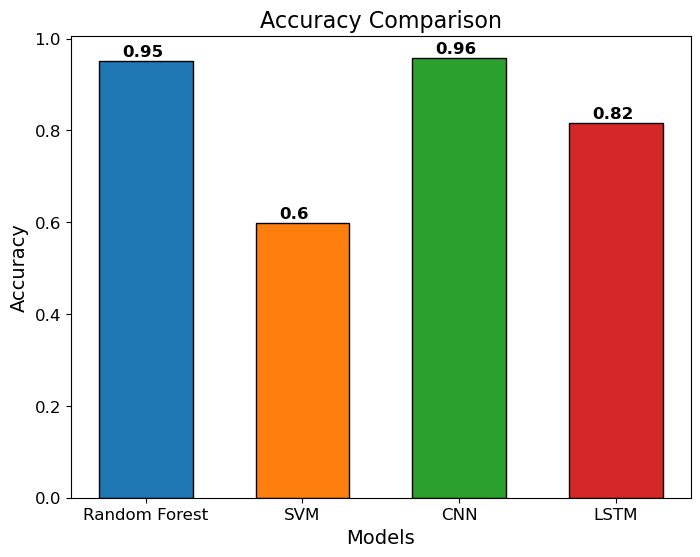

In [63]:
# Define the labels for the bar charts
model_names = ['Random Forest', 'SVM', 'CNN', 'LSTM']

# Calculate accuracy, F1-score, precision, and recall for each model
accuracy_scores = [accuracy_score(y_test, y_test_pred_rf), accuracy_score(y_test, y_test_pred_svm),
                   accuracy_score(y_test, y_test_pred_cnn), accuracy_score(y_test, y_test_pred_lstm)]
f1_scores = [f1_score(y_test, y_test_pred_rf, average='weighted'), f1_score(y_test, y_test_pred_svm, average='weighted'),
             f1_score(y_test, y_test_pred_cnn, average='weighted'), f1_score(y_test, y_test_pred_lstm, average='weighted')]
precision_scores = [precision_score(y_test, y_test_pred_rf, average='weighted'), precision_score(y_test, y_test_pred_svm, average='weighted'),
                    precision_score(y_test, y_test_pred_cnn, average='weighted'), precision_score(y_test, y_test_pred_lstm, average='weighted')]
recall_scores = [recall_score(y_test, y_test_pred_rf, average='weighted'), recall_score(y_test, y_test_pred_svm, average='weighted'),
                 recall_score(y_test, y_test_pred_cnn, average='weighted'), recall_score(y_test, y_test_pred_lstm, average='weighted')]

# Plot bar charts for accuracy, F1-score, precision, and recall
plot_bar_chart("Accuracy Comparison", model_names, accuracy_scores, "Accuracy")


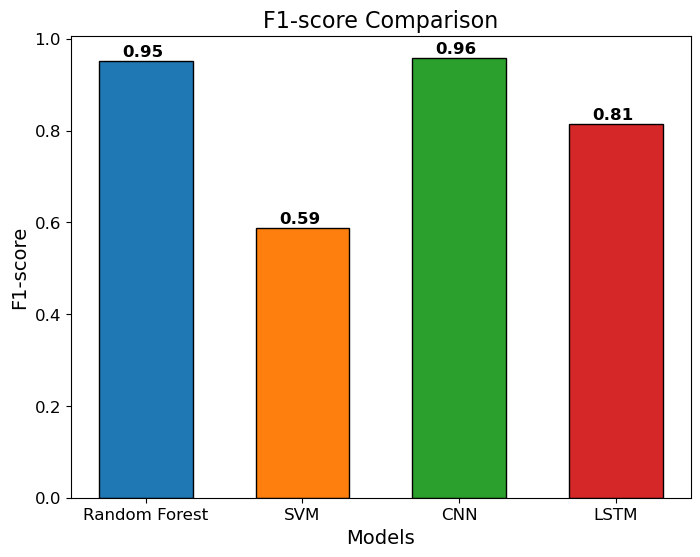

In [64]:
plot_bar_chart("F1-score Comparison", model_names, f1_scores, "F1-score")

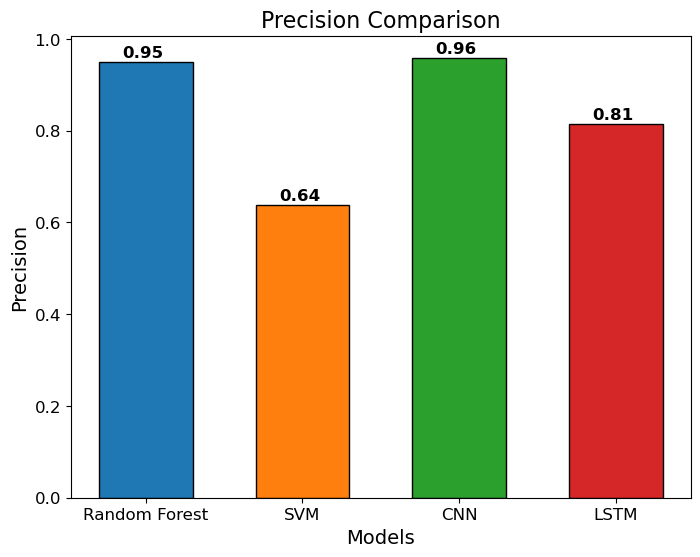

In [65]:
plot_bar_chart("Precision Comparison", model_names, precision_scores, "Precision")

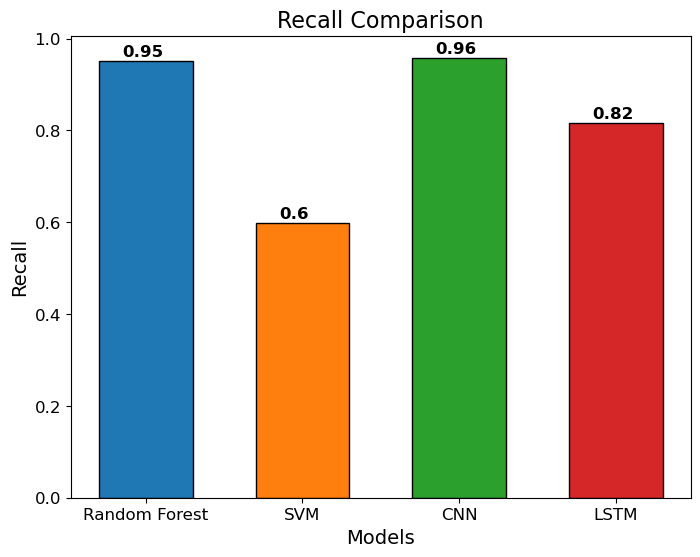

In [66]:
plot_bar_chart("Recall Comparison", model_names, recall_scores, "Recall")

From the given results, we can draw the following conclusions:

1. Random Forest demonstrates strong overall performance, with an accuracy of 0.95. All classes have high precision, recall, and f1-scores, indicating that the model effectively distinguishes between different ECG heartbeat types.

2. Support Vector Machine exhibits relatively poor performance, with an accuracy of 0.60. The precision, recall, and f1-scores for class 0 (Normal beat) are particularly low, suggesting that the model struggles to classify this class correctly. However, the model performs better for classes 1-4, although the performance is still inferior to the other models.

3. Convolutional Neural Network (CNN) showcases excellent performance, with an accuracy of 0.96. All classes have high precision, recall, and f1-scores, making this model the best among the four in terms of classification performance.

4. Long Short-Term Memory (LSTM) presents moderate performance, with an accuracy of 0.79. The model performs well for classes 1-4, but it has difficulty distinguishing class 0 (Normal beat) effectively. This is evident from the lower precision, recall, and f1-score values for class 0 compared to the other classes.

In summary, the Convolutional Neural Network (CNN) is the best-performing model among the four, followed by the Random Forest model. The Support Vector Machine and Long Short-Term Memory models have lower performance in comparison. The CNN model can accurately classify different ECG heartbeat types, making it a suitable choice for this problem.

### Saving our best performing model (i.e. CNN)

In [67]:
cnn_model.save('cnn_model.h5')